In [5]:
%config InlineBackend.figure_format = 'retina' # For mac users with Retina display
import numpy as np
import matplotlib as mtlp
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import yaml
import pymc3 as pm
import arviz as az
import theano
import pandas as pd
from matplotlib import rc
from scipy import optimize
import seaborn as sns
import pickle 
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as mpl_patches
######
import sys
sys.path.append('../HelpherFunctions/')
from mypygtc import * # modified version 
######
rc('text', usetex=True)
filename ="../results/data.yaml"
########
stream = open(filename, 'r')#
data = yaml.safe_load(stream)
#
colpastil = ['#9cadce','#937eba','#f09494','#72bbd0','#52b2cf','#ffafcc','#d3ab9e' ]
NBINS = 100
LambdaNP2 = 1e+3**2
v4 = 246.**4
v3 = 246.**3
mh2 = 125.1**2
sqrt_2 = np.sqrt(2.0)

In [6]:

def mode(x):
    """ Finds the mode of x
        argument:
            x: an array
    """
    n, bins = np.histogram(x, bins=101)
    m = np.argmax(n)
    m = (bins[m] + bins[m-1])/2.
    return m

def multimode(x, n, hdi_prob):
    """ Finds all the modes in the distribution
        arguments:
            x: the array for the distribution
            n: the identifier for the variable
    """
    md = az.hdi(x, hdi_prob=hdi_prob, multimodal=False)
    if len(md) < 2 and n > 1:
        return np.NaN
    else:
        return md[n%2]
    
def mode(x):
    # Function to find mode of an array x
    n, bins = np.histogram(x, bins=101)
    m = np.argmax(n)
    m = (bins[m] + bins[m-1])/2.
    return m

def minimize(likelihood, guess):
    """ Minimizing routine for finding global mode
    argument:
        likelihood: the likelihood function
        guess: the guess for the mode, [r, theta]
    """
    res = optimize.minimize(lambda x: -likelihood(x[0], x[1]), guess, method='BFGS', tol=1e-6)
    return res
unity = lambda x : x
stats_func_2 = {
        'b0': lambda x: multimode(x, 0, 0.9545),
        'b1': lambda x: multimode(x, 1, 0.9545),
        }
stats_func_1 = {
        'b0': lambda x: multimode(x, 0, 0.6827),
        'b1': lambda x: multimode(x, 1, 0.6827),
        }

          0         1         2         3
0  1.000000  0.955504  0.081459 -0.600333
1  0.955504  1.000000  0.299279 -0.366471
2  0.081459  0.299279  1.000000  0.643761
3 -0.600333 -0.366471  0.643761  1.000000


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


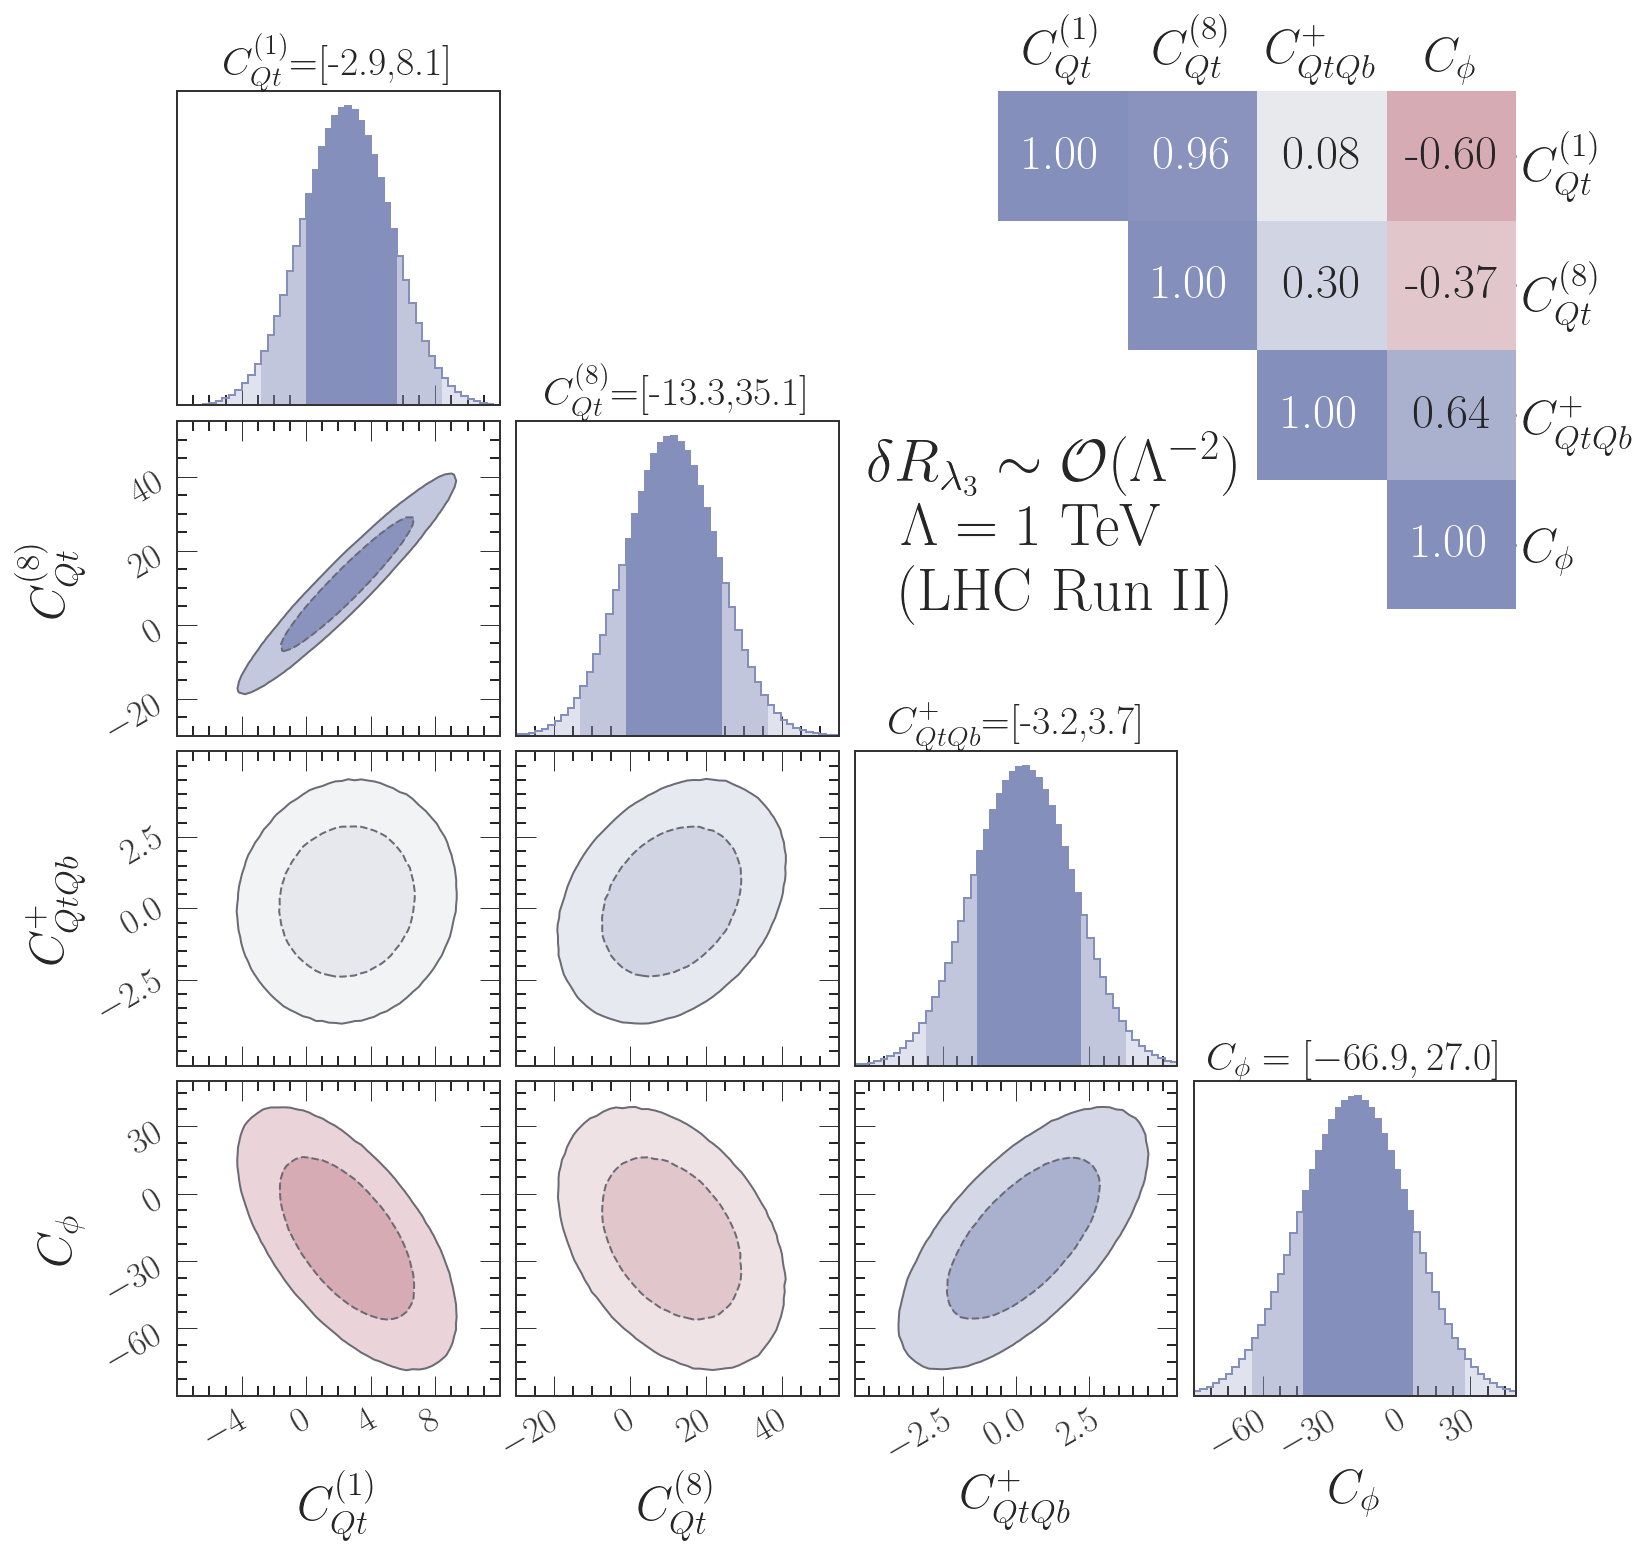

In [9]:
## 
NBINS = 50
var=[r'$C_{Qt}^{(1)}$',r'$C_{Qt}^{(8)}$',r'$C_{QtQb}^{+}$',r'$C_\phi$']
col=['#9cadce','#cad0e4','#dbe0ee']
## ***************************************************************************
## * RC param                                                                 *
## ***************************************************************************
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['font.family'] = 'serf'
## ***************************************************************************
trace_dir='../results/fits/4paramfit_LHC_RunII_l3L_rge.pickle'
#limits = [-8., 12,-25.0,40.,-3.,5.0, -35, 25] #for quad run2
limits = [-8., 12,-30.0,55.,-5.5,5.5, -90, 50] #for lin run2
with open(trace_dir, 'rb') as buff:
        data1 = pickle.load(buff)
        model = data1['model']
        trace_1 = data1['trace']
        
        
tr1 =np.array([trace_1.get_values('k1', burn=100, combine=True)]).flatten().T
tr2 =np.array([trace_1.get_values('k2', burn=100, combine=True)]).flatten().T
tr3 =np.array([trace_1.get_values('k3', burn=100, combine=True)]).flatten().T
tr4 =np.array([trace_1.get_values('k4', burn=100, combine=True)]).flatten().T
##

samples = np.array([tr1,tr2,tr3,tr4])
#plt.violinplot(tr4)
samples2 = np.vstack((tr1,tr2,tr3,tr4)).T
tr = pd.DataFrame(samples2)
corr=tr.corr()
print(corr)
paramRanges = ((limits[0], limits[1]),
               (limits[2], limits[3]),
               (limits[4], limits[5]),
              (limits[6], limits[7]))
pal= sns.diverging_palette(259,0,s=38,l=60, n=201,as_cmap=False)
#pal=sns.diverging_palette(200, 283, s=70, l=55, n=201)
GTC = plotGTC(chains=samples2,
                    paramNames=var,
                   # chainLabels=[r'$\lambda_3^{L}$',r'$\lambda_3^{R}$'],
                    paramRanges=paramRanges,
              #      truths=[0.],
               #     priors=xmu,
               #     truthLabels='',
                    smoothingKernel=0,
                    nBins=NBINS, #40525e
                    #  colorsOrder=['lina_blues'],
                    Bildgruess =(12,12),
                    holdRC=True,
                    palette=pal,
                    panelSpacing='loose',
                    mathTextFontSet=None,
                    customLegendFont={'family':'serf', 'size':28},
                    customTickFont={'family':'serf', 'size':18},
                    customLabelFont={'family':'serf', 'size':24},
                    #doOnly1dPlot=True,
                    plotDensity= False,
                    filledPlots=True)
axx = GTC.get_axes()

vl=['k1','k2','k3','k4']
df_1 = pd.DataFrame(az.summary(trace_1, kind='stats', hdi_prob=0.6827, round_to='none', stat_funcs=stats_func_1))
df_2 = pd.DataFrame(az.summary(trace_1, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))

for j in range(4):
    for i in range(NBINS):
        
            lim_1l = min((df_1.loc[vl[j]]['b0']),(df_1.loc[vl[j]]['b1']))
            lim_1u = max((df_1.loc[vl[j]]['b0']),(df_1.loc[vl[j]]['b1']))     
            lim_2l = min((df_2.loc[vl[j]]['b0']),(df_2.loc[vl[j]]['b1']))
            lim_2u = max((df_2.loc[vl[j]]['b0']),(df_2.loc[vl[j]]['b1'])) 
            if axx[6+j].patches[i].xy[0] > lim_1l and axx[6+j].patches[i].xy[0] < lim_1u:
                axx[6+j].patches[i].set_alpha(1.0)
            elif axx[6+j].patches[i].xy[0] > lim_2l and axx[6+j].patches[i].xy[0] < lim_2u:
                axx[6+j].patches[i].set_alpha(.5)
            else:
                axx[6+j].patches[i].set_alpha(.25)

#######                
for ax in GTC.get_axes():
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.tick_params(axis='y', which='both', direction='in')
        ax.tick_params(axis='x',  which='both',direction='in')
        ax.tick_params(axis='y', which='minor', top=True, size= 5)
        ax.tick_params(axis='x',  which='minor',right=True,size= 5)
        ax.tick_params(axis='y', which='major', rotation=30,top=True,size=10 )
        ax.tick_params(axis='x',  which='major', rotation=30,right=True,size=10 )

axx[9].set_title(r'$C_\phi=[{:3.1f},{:3.1f}]$'.format(df_2.loc['k4']['hdi_2.275%'],df_2.loc['k4']['hdi_97.725%']),fontsize=20)
axx[6].set_title(r'{}=[{:2.1f},{:2.1f}]'.format(r"$C_{Qt}^{(1)}$",df_2.loc['k1']['hdi_2.275%'],df_2.loc['k1']['hdi_97.725%']),fontsize=20)

axx[7].set_title(r'{}=[{:2.1f},{:2.1f}]'.format(r"$C_{Qt}^{(8)}$",df_2.loc['k2']['hdi_2.275%'],df_2.loc['k2']['hdi_97.725%']),fontsize=20)

axx[8].set_title(r'{}=[{:2.1f},{:2.1f}]'.format(r"$C_{QtQb}^+$",df_2.loc['k3']['hdi_2.275%'],df_2.loc['k3']['hdi_97.725%']),fontsize=20)
###################################################################
l, b, h, w = .6, .58, .3, .3
ax2 = GTC.add_axes([l, b, w, h])
#ax2.plot([1, 4, 6, 2, 1, 5, 2], color='green', lw=3, label="inside plot")
cmap = sns.diverging_palette(0,259,s=38,l=60, as_cmap=True)
#cmap=sns.diverging_palette(283,200 , s=70, l=55, n=201 ,as_cmap=True)
mask = np.zeros((corr.shape[1],corr.shape[1]))
mask[np.tril_indices_from(mask)] = True
np.fill_diagonal(mask,0)
heat = sns.heatmap(corr+0., mask=mask, center=0.00,cbar=False,annot=True, cmap=cmap, cbar_kws={"aspect": 50}, xticklabels=var, yticklabels=var,
                   annot_kws={"fontsize": 24},ax=ax2,fmt='.2f')
sns.set(font_scale=2., style='ticks')
ax2.text(-1.,3.0,r"$\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$",fontsize=30)
ax2.text(-0.75,3.5,r"$\Lambda=1$ TeV",fontsize=30)
ax2.text(-0.75,4.,r"(LHC Run II)",fontsize=30)
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 24, rotation=0)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 24, rotation=0)
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']}) 
heat.xaxis.tick_top() 
heat.xaxis.set_label_position('top')
heat.yaxis.tick_right() 
heat.yaxis.set_label_position('right')
heat.tick_params(axis='both', which='major', size=1)
GTC.savefig( '../results/plots/4param_fit_LHC_RunII_l3L_rge.pdf', dpi=300,transparent=False,bbox_inches='tight')
plt.show()

          0         1         2         3         4
0  1.000000 -0.020605  0.211477  0.945622 -0.056676
1 -0.020605  1.000000  0.618023 -0.337211 -0.016560
2  0.211477  0.618023  1.000000  0.001700  0.056707
3  0.945622 -0.337211  0.001700  1.000000 -0.003579
4 -0.056676 -0.016560  0.056707 -0.003579  1.000000


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


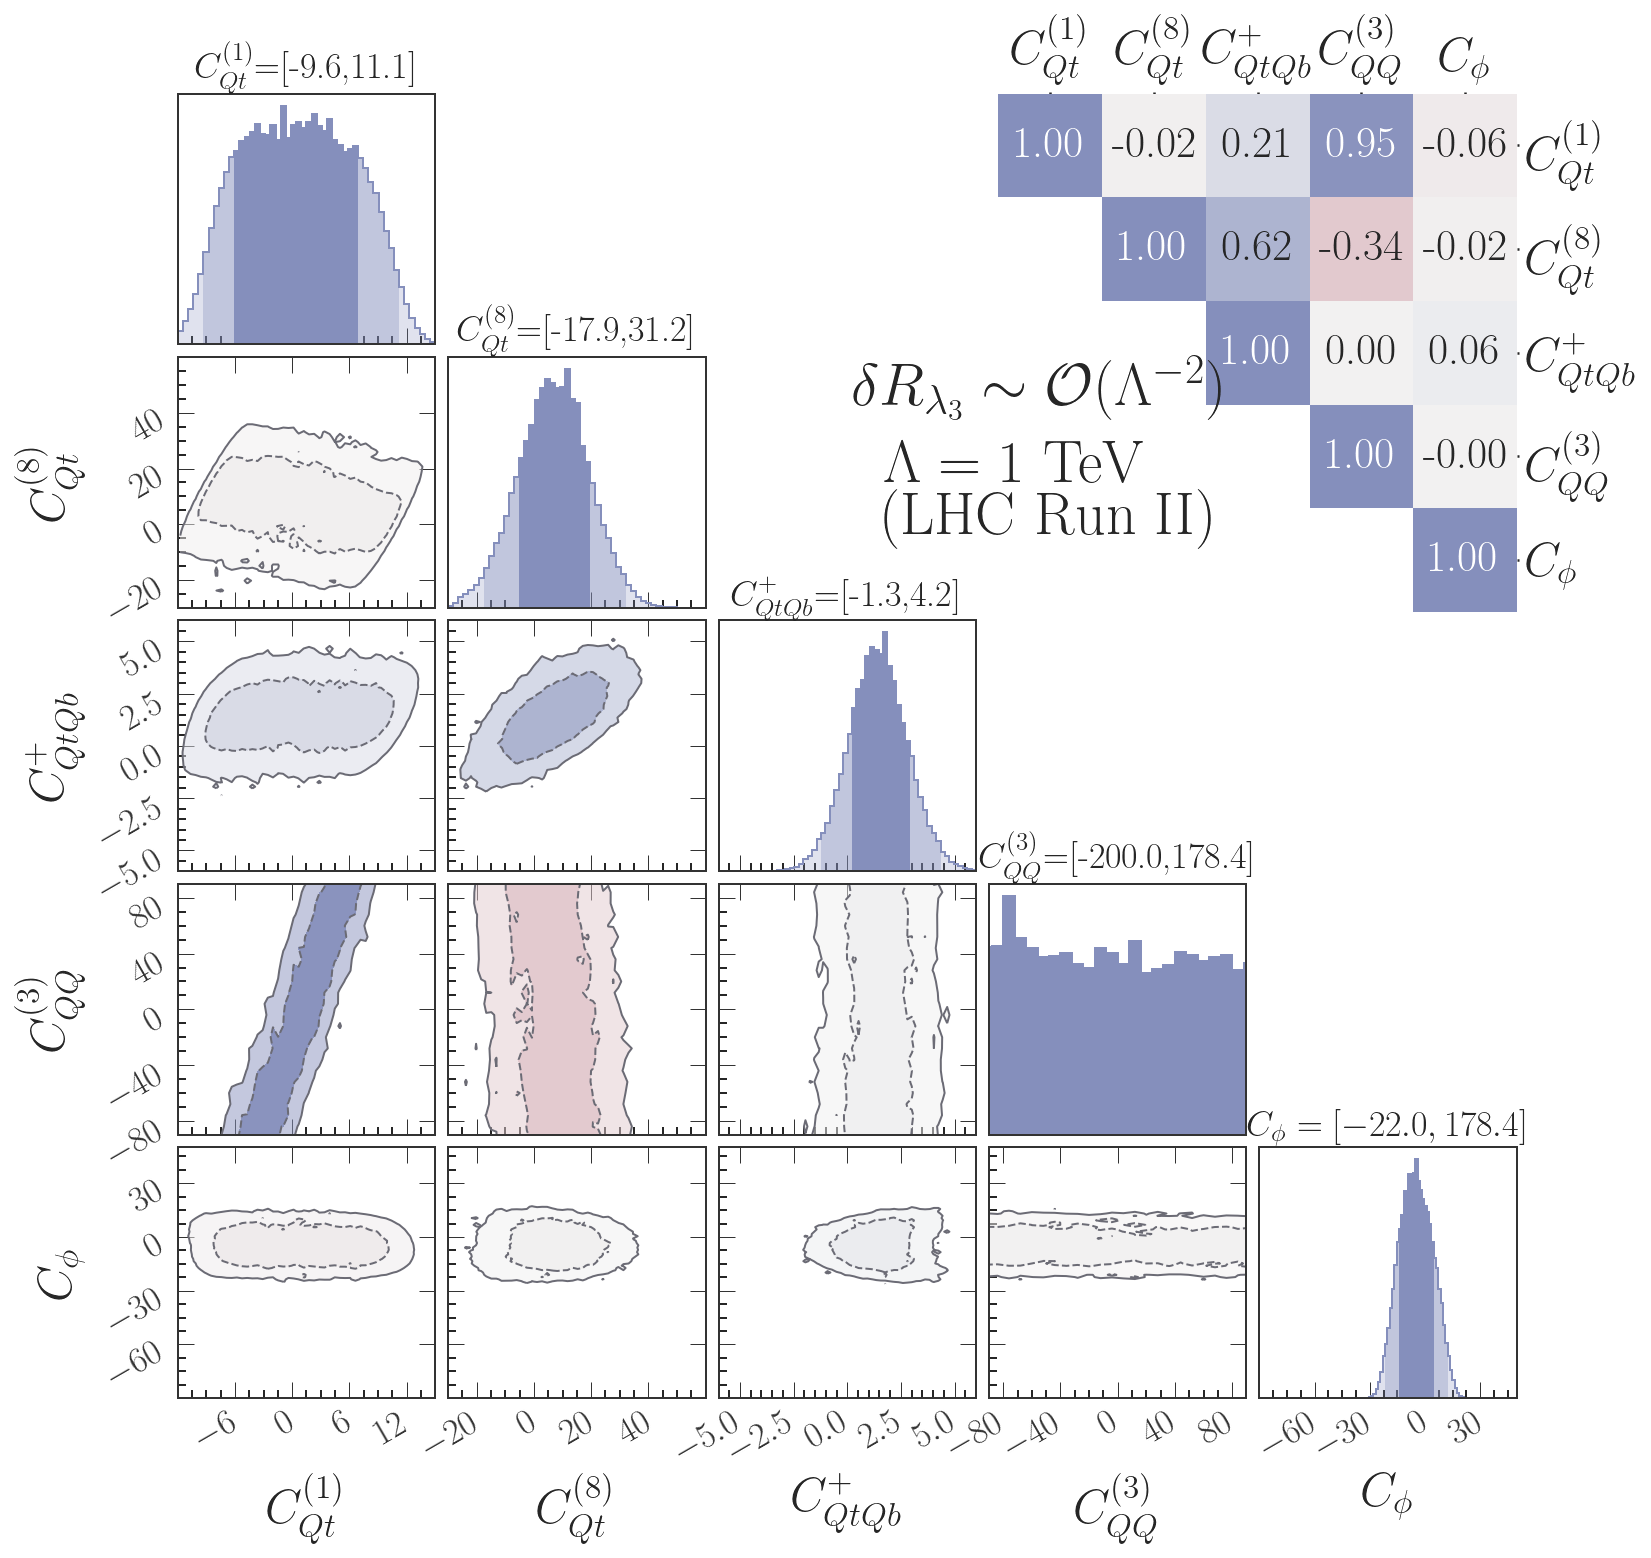

In [4]:
var=[r'$C_{Qt}^{(1)}$',r'$C_{Qt}^{(8)}$',r'$C_{QtQb}^{+}$',r'$C_{QQ}^{(3)}$',r'$C_\phi$']
col=['#9cadce','#cad0e4','#dbe0ee']
NBINS = 50
trace_dir='../results/fits/5paramfit_LHC_RunII_l3Q_rge.pickle'
#limits = [-8., 12,-25.0,40.,-3.,5.0, -35, 25] #for quad run2
limits = [-12., 15,-30.0,60.,-6.,6.0,-90,90, -90, 50] #for lin run2
with open(trace_dir, 'rb') as buff:
        data1 = pickle.load(buff)
        model = data1['model']
        trace_1 = data1['trace']
        
        
tr1 =np.array([trace_1.get_values('k1', burn=100, combine=True)]).flatten().T
tr2 =np.array([trace_1.get_values('k2', burn=100, combine=True)]).flatten().T
tr3 =np.array([trace_1.get_values('k3', burn=100, combine=True)]).flatten().T
tr4 =np.array([trace_1.get_values('k4', burn=100, combine=True)]).flatten().T
tr5 =np.array([trace_1.get_values('k5', burn=100, combine=True)]).flatten().T
##

samples = np.array([tr1,tr2,tr3,tr4,tr5])
#plt.violinplot(tr4)
samples2 = np.vstack((tr1,tr2,tr3,tr4,tr5)).T
tr = pd.DataFrame(samples2)
corr=tr.corr()
print(corr)
paramRanges = ((limits[0], limits[1]),
               (limits[2], limits[3]),
               (limits[4], limits[5]),
              (limits[6], limits[7]),
              (limits[8], limits[9])
              )
pal= sns.diverging_palette(259,0,s=38,l=60, n=201,as_cmap=False)
#pal=sns.diverging_palette(200, 283, s=70, l=55, n=201)
GTC = plotGTC(chains=samples2,
                    paramNames=var,
                   # chainLabels=[r'$\lambda_3^{L}$',r'$\lambda_3^{R}$'],
                    paramRanges=paramRanges,
              #      truths=[0.],
               #     priors=xmu,
               #     truthLabels='',
                    smoothingKernel=0,
                    nBins=NBINS, #40525e
                    #  colorsOrder=['lina_blues'],
                    Bildgruess =(12,12),
                    holdRC=True,
                    palette=pal,
                    panelSpacing='loose',
                    mathTextFontSet=None,
                    customLegendFont={'family':'serf', 'size':28},
                    customTickFont={'family':'serf', 'size':18},
                    customLabelFont={'family':'serf', 'size':24},
                    #doOnly1dPlot=True,
                    plotDensity= False,
                    filledPlots=True)
axx = GTC.get_axes()
vl=['k1','k2','k3','k4','k5']
df_1 = pd.DataFrame(az.summary(trace_1, kind='stats', hdi_prob=0.6827, round_to='none', stat_funcs=stats_func_1))
df_2 = pd.DataFrame(az.summary(trace_1, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))

for j in range(5):
    for i in range(NBINS):
        
            lim_1l = min((df_1.loc[vl[j]]['b0']),(df_1.loc[vl[j]]['b1']))
            lim_1u = max((df_1.loc[vl[j]]['b0']),(df_1.loc[vl[j]]['b1']))     
            lim_2l = min((df_2.loc[vl[j]]['b0']),(df_2.loc[vl[j]]['b1']))
            lim_2u = max((df_2.loc[vl[j]]['b0']),(df_2.loc[vl[j]]['b1'])) 
            if axx[10+j].patches[i].xy[0] > lim_1l and axx[10+j].patches[i].xy[0] < lim_1u:
                axx[10+j].patches[i].set_alpha(1.0)
            elif axx[10+j].patches[i].xy[0] > lim_2l and axx[10+j].patches[i].xy[0] < lim_2u:
                axx[10+j].patches[i].set_alpha(.5)
            else:
                axx[10+j].patches[i].set_alpha(.25)

#######                
for ax in GTC.get_axes():
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.tick_params(axis='y', which='both', direction='in')
        ax.tick_params(axis='x',  which='both',direction='in')
        ax.tick_params(axis='y', which='minor', top=True, size= 4)
        ax.tick_params(axis='x',  which='minor',right=True,size= 4)
        ax.tick_params(axis='y', which='major', rotation=30,top=True,size=8 )
        ax.tick_params(axis='x',  which='major', rotation=30,right=True,size=8 )

axx[10].set_title(r'{}=[{:2.1f},{:2.1f}]'.format(r"$C_{Qt}^{(1)}$",df_2.loc['k1']['hdi_2.275%'],df_2.loc['k1']['hdi_97.725%']),fontsize=18)

axx[11].set_title(r'{}=[{:2.1f},{:2.1f}]'.format(r"$C_{Qt}^{(8)}$",df_2.loc['k2']['hdi_2.275%'],df_2.loc['k2']['hdi_97.725%']),fontsize=18)

axx[12].set_title(r'{}=[{:2.1f},{:2.1f}]'.format(r"$C_{QtQb}^+$",df_2.loc['k3']['hdi_2.275%'],df_2.loc['k3']['hdi_97.725%']),fontsize=18)
axx[13].set_title(r'{}=[{:2.1f},{:2.1f}]'.format(r"$C_{QQ}^{(3)}$",df_2.loc['k4']['hdi_2.275%'],df_2.loc['k4']['hdi_97.725%']),fontsize=18)
axx[14].set_title(r'$C_\phi=[{:3.1f},{:3.1f}]$'.format(df_2.loc['k5']['hdi_2.275%'],df_2.loc['k4']['hdi_97.725%']),fontsize=18)
###################################################################
l, b, h, w = .6, .58, .3, .3
ax2 = GTC.add_axes([l, b, w, h])
#ax2.plot([1, 4, 6, 2, 1, 5, 2], color='green', lw=3, label="inside plot")
cmap = sns.diverging_palette(0,259,s=38,l=60, as_cmap=True)
#cmap=sns.diverging_palette(283,200 , s=70, l=55, n=201 ,as_cmap=True)
mask = np.zeros((corr.shape[1],corr.shape[1]))
mask[np.tril_indices_from(mask)] = True
np.fill_diagonal(mask,0)
heat = sns.heatmap(corr+0., mask=mask, center=0.00,cbar=False,annot=True, cmap=cmap, cbar_kws={"aspect": 50}, xticklabels=var, yticklabels=var,
                   annot_kws={"fontsize": 22},ax=ax2,fmt='.2f')
sns.set(font_scale=2., style='ticks')
ax2.text(-1.4,3.0,r"$\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$",fontsize=30)
ax2.text(-1.1,3.75,r"$\Lambda=1$ TeV",fontsize=30)
ax2.text(-1.1,4.25,r"(LHC Run II)",fontsize=30)
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 24, rotation=0)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 24, rotation=0)
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']}) 
heat.xaxis.tick_top() 
heat.xaxis.set_label_position('top')
heat.yaxis.tick_right() 
heat.yaxis.set_label_position('right')
heat.tick_params(axis='both', which='major', size=1)
GTC.savefig( '../results/plots/5param_fit_LHC_RunII_l3L_rge.pdf', dpi=300,transparent=False,bbox_inches='tight')
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using advi_map...


Convergence achieved at 10800
Interrupted at 10,799 [5%]: Average Loss = 18.615
Multiprocess sampling (50 chains in 4 jobs)
NUTS: [k4, k3, k2, k1]


Sampling 50 chains for 10_000 tune and 50_000 draw iterations (500_000 + 2_500_000 draws total) took 7488 seconds.
The number of effective samples is smaller than 25% for some parameters.


          0         1         2         3
0  1.000000  0.969081  0.262284 -0.400967
1  0.969081  1.000000  0.350421 -0.209222
2  0.262284  0.350421  1.000000  0.422146
3 -0.400967 -0.209222  0.422146  1.000000


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


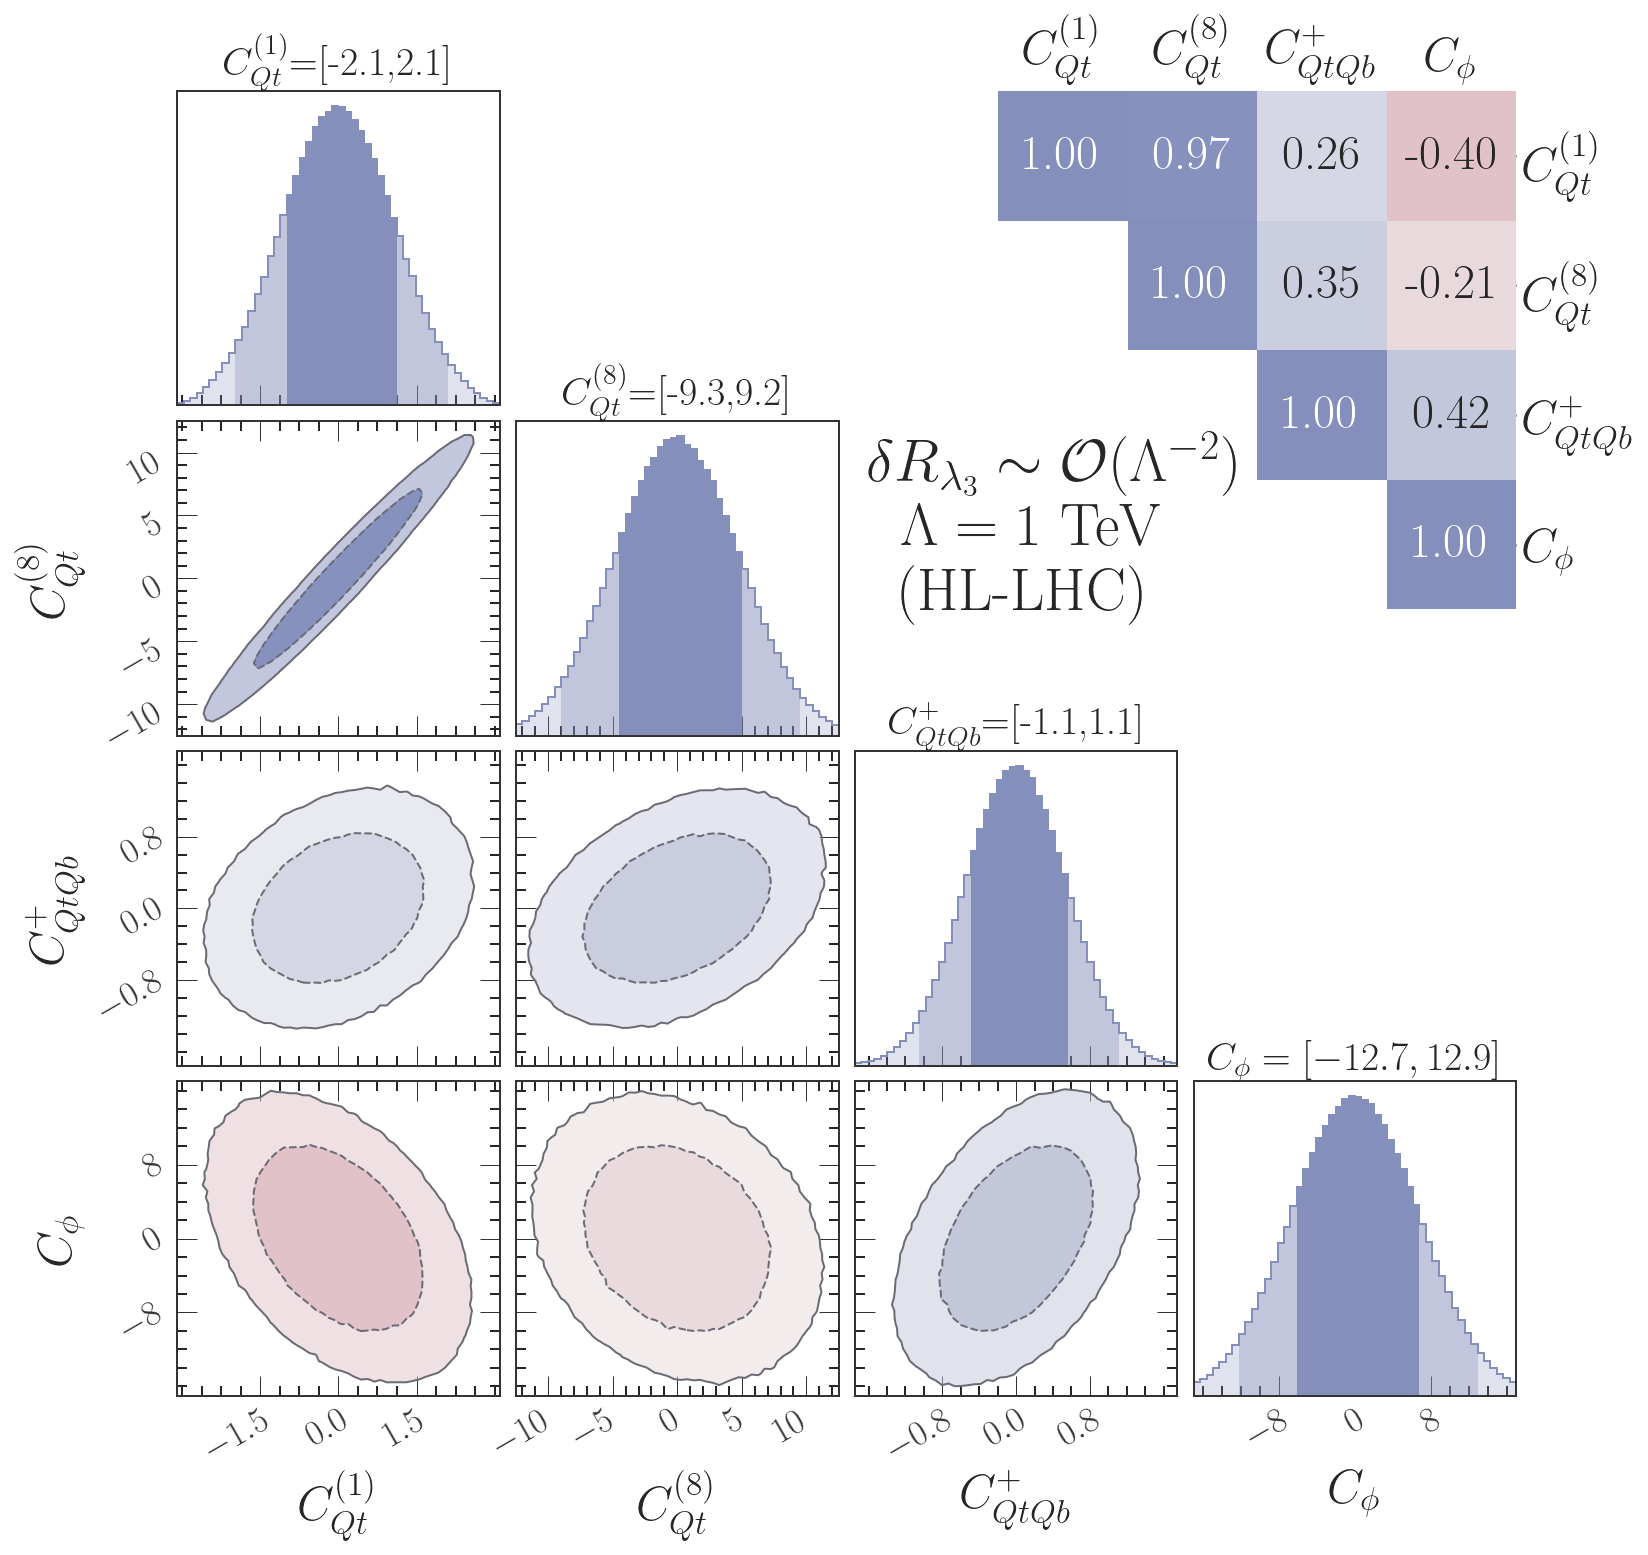

In [17]:
## 
NBINS = 50
CF=4/3
Nc=3
var=[r'$C_{Qt}^{(1)}$',r'$C_{Qt}^{(8)}$',r'$C_{QtQb}^{+}$',r'$C_\phi$']
col=['#9cadce','#cad0e4','#dbe0ee']
## ***************************************************************************
## * RC param                                                                 *
## ***************************************************************************
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['font.family'] = 'serf'
## ***************************************************************************
#col =['#7395ab','#aebdcb','#cdd7e2']
##
llCqtm =lambda Cqu1,Cqu8,Cquqbp,CH :mylikelihoodAV(Cqu1,Cqu8,
                                                   1/2/(2*Nc+1)*Cquqbp,+1/CF*Cquqbp/2,CH,
                                                   data,collider='HL-LHC',mode='rge',l3mode='linear')

#
#llCqtm =lambda Cqu1,Cqu8,Cquqbp,CH :mylikelihoodAV(Cqu1,Cqu8,
 #                                                  1/2/(2*Nc+1)*Cquqbp,+1/CF*Cquqbp/2,CH,data,experiments=['HL-LHC'],
  #                                                                       HiggsChannels=['ggf','vbf','wh','zh','ttxhhllhc'],mode='rge'
   #                                                                     ,TopChannels=None,l3mode='quadratic',linearmu=True) 
limits = [-3.1,3.1,-12.5,12.5,-1.75,1.75, -17, 17] #for lin
#limits = [-8., 12,-30.0,55.,-5.5,5.5, -90, 50] #for lin run2
#limits = [-4., 4.,-15.,15.,-4.,4., -30, 30]
config = [50000, 0.8, 50]
trace_dir='../results/fits/4paramfit_HL-LHC_l3L_rge.pickle'

with open(trace_dir, 'rb') as buff:
        data1 = pickle.load(buff)
        model = data1['model']
        trace_1 = data1['trace']
        
        
tr1 =np.array([trace_1.get_values('k1', burn=100, combine=True)]).flatten().T
tr2 =np.array([trace_1.get_values('k2', burn=100, combine=True)]).flatten().T
tr3 =np.array([trace_1.get_values('k3', burn=100, combine=True)]).flatten().T
tr4 =np.array([trace_1.get_values('k4', burn=100, combine=True)]).flatten().T
##

samples = np.array([tr1,tr2,tr3,tr4])
#plt.violinplot(tr4)
samples2 = np.vstack((tr1,tr2,tr3,tr4)).T
tr = pd.DataFrame(samples2)
corr=tr.corr()
print(corr)
paramRanges = ((limits[0], limits[1]),
               (limits[2], limits[3]),
               (limits[4], limits[5]),
              (limits[6], limits[7]))
pal= sns.diverging_palette(259,0,s=38,l=60, n=201,as_cmap=False)
#pal=sns.diverging_palette(200, 283, s=70, l=55, n=201)
GTC = plotGTC(chains=samples2,
                    paramNames=var,
                   # chainLabels=[r'$\lambda_3^{L}$',r'$\lambda_3^{R}$'],
                    paramRanges=paramRanges,
              #      truths=[0.],
               #     priors=xmu,
               #     truthLabels='',
                    smoothingKernel=0,
                    nBins=NBINS, #40525e
                    #  colorsOrder=['lina_blues'],
                    Bildgruess =(12,12),
                    holdRC=True,
                    palette=pal,
                    panelSpacing='loose',
                    mathTextFontSet=None,
                    customLegendFont={'family':'serf', 'size':28},
                    customTickFont={'family':'serf', 'size':18},
                    customLabelFont={'family':'serf', 'size':24},
                    #doOnly1dPlot=True,
                    plotDensity= False,
                    filledPlots=True)
axx = GTC.get_axes()

vl=['k1','k2','k3','k4']
df_1 = pd.DataFrame(az.summary(trace_1, kind='stats', hdi_prob=0.6827, round_to='none', stat_funcs=stats_func_1))
df_2 = pd.DataFrame(az.summary(trace_1, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))

for j in range(4):
    for i in range(NBINS):
        
            lim_1l = min((df_1.loc[vl[j]]['b0']),(df_1.loc[vl[j]]['b1']))
            lim_1u = max((df_1.loc[vl[j]]['b0']),(df_1.loc[vl[j]]['b1']))     
            lim_2l = min((df_2.loc[vl[j]]['b0']),(df_2.loc[vl[j]]['b1']))
            lim_2u = max((df_2.loc[vl[j]]['b0']),(df_2.loc[vl[j]]['b1'])) 
            if axx[6+j].patches[i].xy[0] > lim_1l and axx[6+j].patches[i].xy[0] < lim_1u:
                axx[6+j].patches[i].set_alpha(1.0)
            elif axx[6+j].patches[i].xy[0] > lim_2l and axx[6+j].patches[i].xy[0] < lim_2u:
                axx[6+j].patches[i].set_alpha(.5)
            else:
                axx[6+j].patches[i].set_alpha(.25)

#######                
for ax in GTC.get_axes():
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.tick_params(axis='y', which='both', direction='in')
        ax.tick_params(axis='x',  which='both',direction='in')
        ax.tick_params(axis='y', which='minor', top=True, size= 5)
        ax.tick_params(axis='x',  which='minor',right=True,size= 5)
        ax.tick_params(axis='y', which='major', rotation=30,top=True,size=10 )
        ax.tick_params(axis='x',  which='major', rotation=30,right=True,size=10 )

axx[9].set_title(r'$C_\phi=[{:3.1f},{:3.1f}]$'.format(df_2.loc['k4']['hdi_2.275%'],df_2.loc['k4']['hdi_97.725%']),fontsize=20)
axx[6].set_title(r'{}=[{:2.1f},{:2.1f}]'.format(r"$C_{Qt}^{(1)}$",df_2.loc['k1']['hdi_2.275%'],df_2.loc['k1']['hdi_97.725%']),fontsize=20)

axx[7].set_title(r'{}=[{:2.1f},{:2.1f}]'.format(r"$C_{Qt}^{(8)}$",df_2.loc['k2']['hdi_2.275%'],df_2.loc['k2']['hdi_97.725%']),fontsize=20)

axx[8].set_title(r'{}=[{:2.1f},{:2.1f}]'.format(r"$C_{QtQb}^+$",df_2.loc['k3']['hdi_2.275%'],df_2.loc['k3']['hdi_97.725%']),fontsize=20)
###################################################################
l, b, h, w = .6, .58, .3, .3
ax2 = GTC.add_axes([l, b, w, h])
#ax2.plot([1, 4, 6, 2, 1, 5, 2], color='green', lw=3, label="inside plot")
cmap = sns.diverging_palette(0,259,s=38,l=60, as_cmap=True)
#cmap=sns.diverging_palette(283,200 , s=70, l=55, n=201 ,as_cmap=True)
mask = np.zeros((corr.shape[1],corr.shape[1]))
mask[np.tril_indices_from(mask)] = True
np.fill_diagonal(mask,0)
heat = sns.heatmap(corr+0., mask=mask, center=0.00,cbar=False,annot=True, cmap=cmap, cbar_kws={"aspect": 50}, xticklabels=var, yticklabels=var,
                   annot_kws={"fontsize": 24},ax=ax2,fmt='.2f')
sns.set(font_scale=2., style='ticks')
ax2.text(-1.,3.0,r"$\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$",fontsize=30)
ax2.text(-0.75,3.5,r"$\Lambda=1$ TeV",fontsize=30)
ax2.text(-0.75,4.,r"(HL-LHC)",fontsize=30)
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 24, rotation=0)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 24, rotation=0)
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']}) 
heat.xaxis.tick_top() 
heat.xaxis.set_label_position('top')
heat.yaxis.tick_right() 
heat.yaxis.set_label_position('right')
heat.tick_params(axis='both', which='major', size=1)
GTC.savefig( '../results/plots/4param_fit_HL-LHC_l3L_rge.pdf', dpi=300,transparent=False,bbox_inches='tight')
plt.show()

In [6]:
from iminuit import Minuit
import tabulate as tab
import seaborn as sns
from matplotlib.colors import LogNorm
def fit4(func):
    m = Minuit(func,Cqu1=0,Cqu8=0,Cquqbp=0,CH=0)
    m.errordef= Minuit.LEAST_SQUARES
    m.migrad()
    print(m.values)
    print(m.errors)
    print(m.params)
    print(tab.tabulate(*m.covariance.correlation().to_table()))
    #print(m.matrix(correlation=True))
    return m.covariance.correlation()

llCqtmchi2 =lambda Cqu1,Cqu8,Cquqbp,CH :-2*mylikelihoodAV(Cqu1,Cqu8,
                                                   1/2/(2*Nc+1)*Cquqbp,+1/CF*Cquqbp/2,CH,data,experiments=['CMS','ATLAS'],
                                                                           HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh']
                                                                           ,TopChannels=None, linearl3=False,linearmu=True)

fit4linear = fit4(llCqtmchi2)


<ValueView Cqu1=-0.48013621696434056 Cqu8=-8.305885900744242 Cquqbp=1.8575322368183418 CH=-7.276265424492062>
<ErrorView Cqu1=0.8234413008469181 Cqu8=7.075070469771941 Cquqbp=1.4855683869787473 CH=9.583208628999243>
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Cqu1   │   -0.5    │    0.8    │            │            │         │         │       │
│ 1 │ Cqu8   │    -8     │     7     │            │            │         │         │       │
│ 2 │ Cquqbp │    1.9    │    1.5    │            │            │         │         │       │
│ 3 │ CH     │    -7     │    10     │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
          Cqu1     Cqu8    Cquqbp       

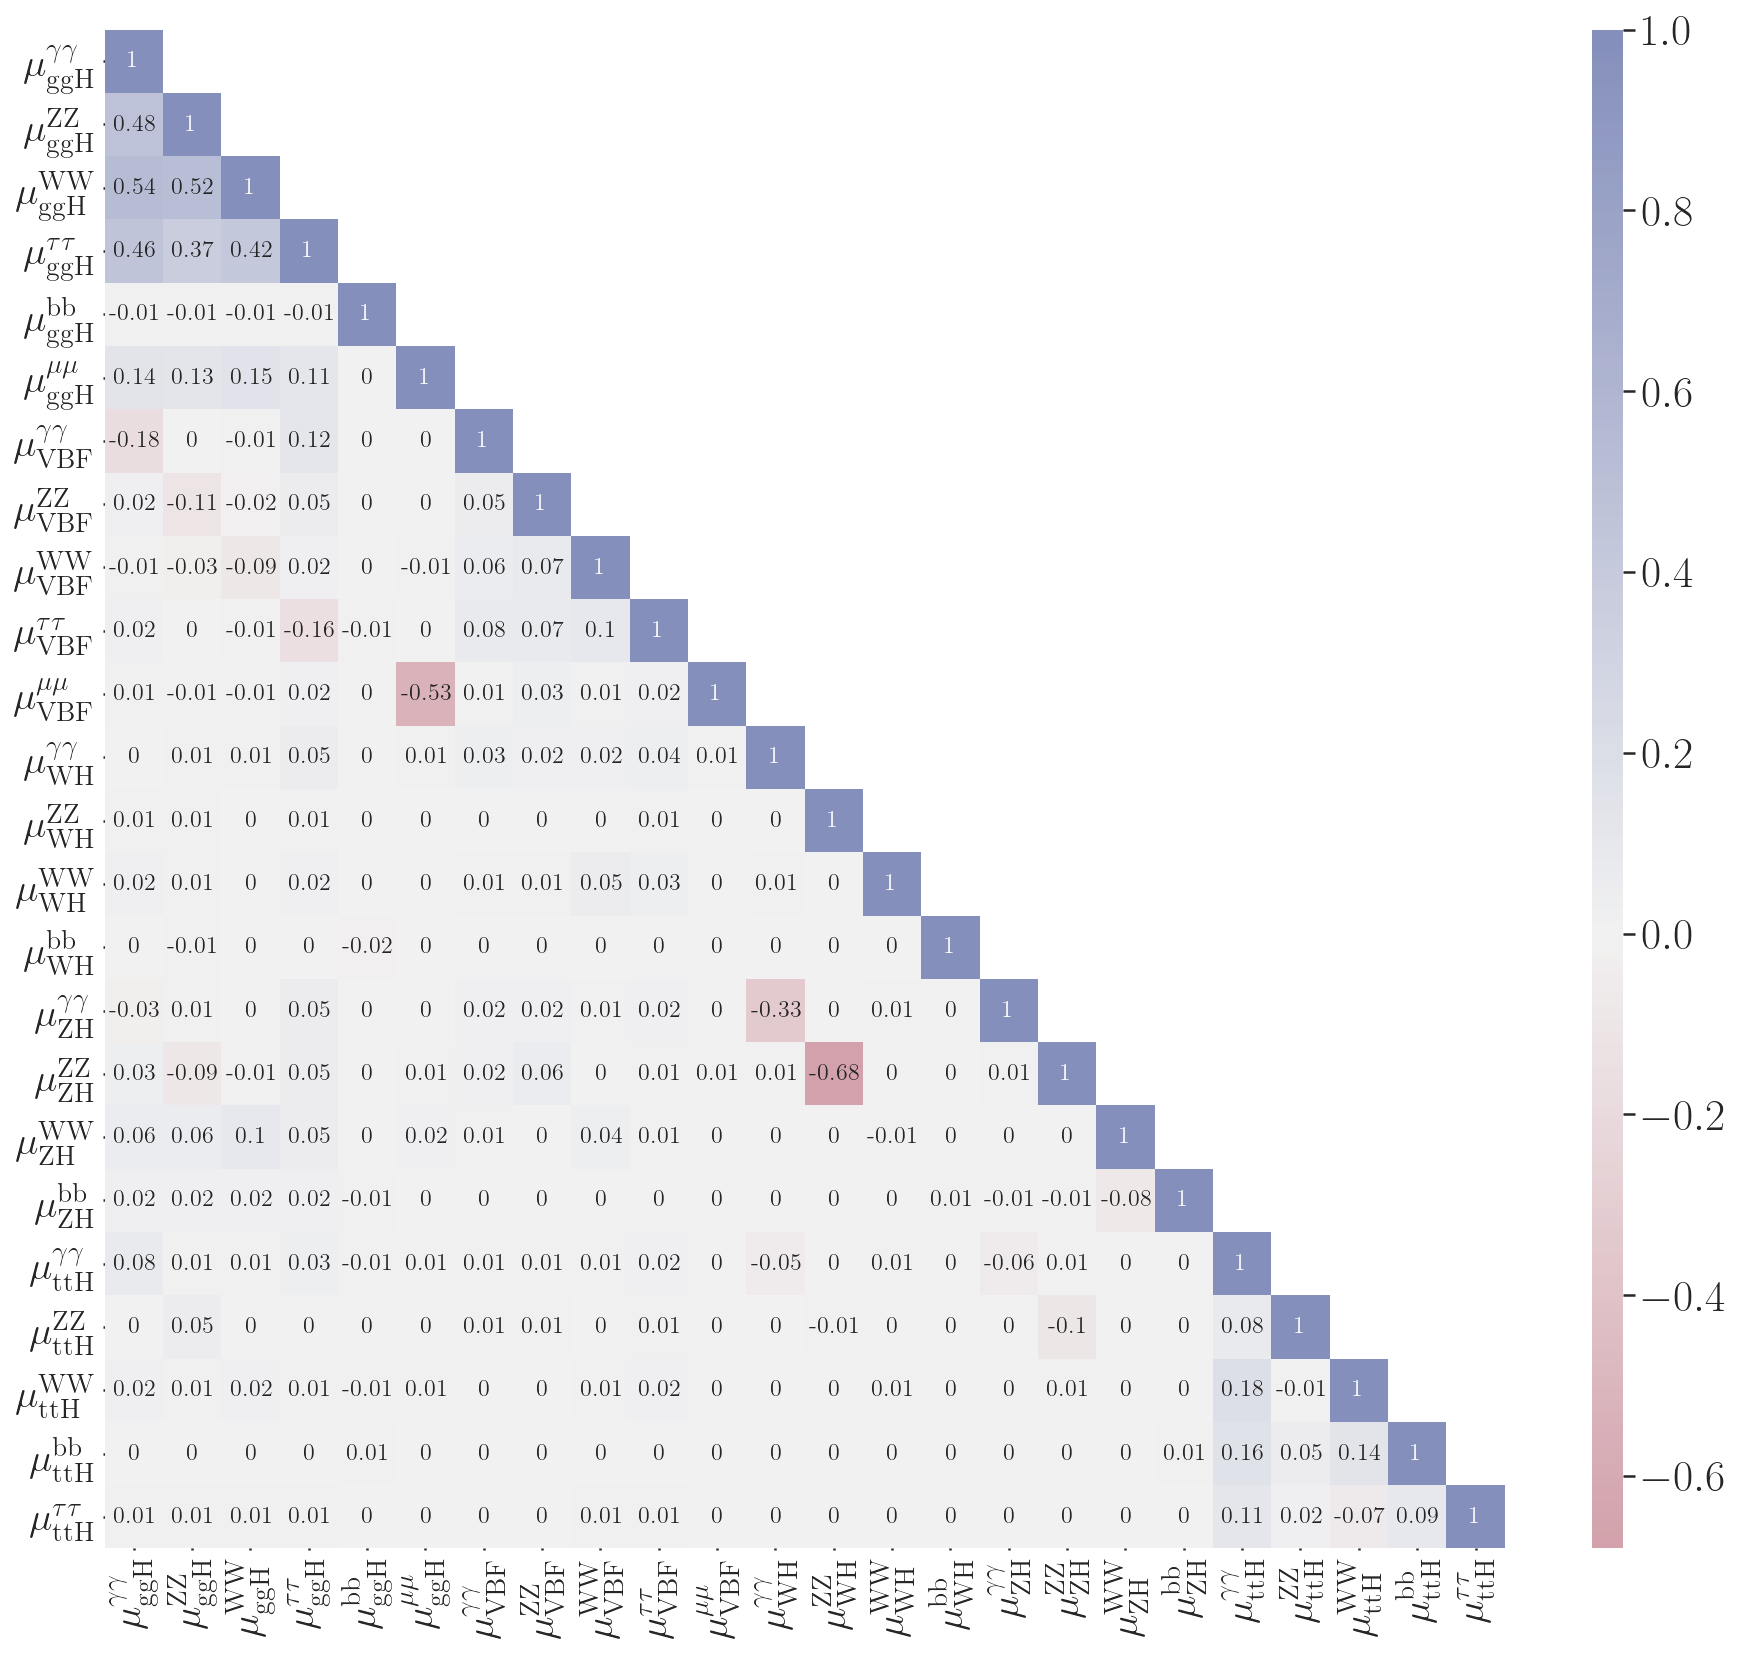

In [26]:
var=[r'$\mu_{\mathrm{ggH}}^{\gamma \gamma }$',
r'$\mu_{\mathrm{ggH}}^{\mathrm{ZZ}}$',
r'$\mu_{\mathrm{ggH}}^{\mathrm{WW}}$',
r'$\mu_{\mathrm{ggH}}^{\tau \tau }$',
r'$\mu_{\mathrm{ggH}}^{\mathrm{bb}}$',
r'$\mu_{\mathrm{ggH}}^{\mu \mu } $',
r'$\mu_{\mathrm{VBF}}^{\gamma \gamma }$',
r'$\mu_{\mathrm{VBF}}^{\mathrm{ZZ}}$',
r'$\mu_{\mathrm{VBF}}^{\mathrm{WW}}$',
r'$\mu_{\mathrm{VBF}}^{\tau \tau }$',
r'$\mu_{\mathrm{VBF}}^{\mu \mu } $',
r'$\mu_{\mathrm{WH}}^{\gamma \gamma }$',
r'$\mu_{\mathrm{WH}}^{\mathrm{ZZ}}$',
r'$\mu_{\mathrm{WH}}^{\mathrm{WW}}$',
r'$\mu_{\mathrm{WH}}^{\mathrm{bb}}$',
r'$\mu_{\mathrm{ZH}}^{\gamma \gamma }$',
r'$\mu_{\mathrm{ZH}}^{\mathrm{ZZ}}$',
r'$\mu_{\mathrm{ZH}}^{\mathrm{WW}}$',
r'$\mu_{\mathrm{ZH}}^{\mathrm{bb}}$',
r'$\mu_{\mathrm{ttH}}^{\gamma \gamma }$',
r'$\mu_{\mathrm{ttH}}^{\mathrm{ZZ}}$',
r'$\mu_{\mathrm{ttH}}^{\mathrm{WW}}$',
r'$\mu_{\mathrm{ttH}}^{\mathrm{bb}}$',
r'$\mu_{\mathrm{ttH}}^{\tau \tau }$']

dirc= '/beegfs/desy/user/lalasfar/trilinear4tops'
corr =crr2=np.loadtxt(dirc+"/results/correlation_matrix_CMS_HL-LHC.dat")
fig, ax = plt.subplots(figsize=(13.5, 12))
cmap = sns.diverging_palette(0,259,s=38,l=60, as_cmap=True)
mask = np.zeros((corr.shape[1],corr.shape[1]))
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask,0)
heat = sns.heatmap(corr+0., mask=mask, center=0.0,cbar=True,annot=True, cmap=cmap, cbar_kws={"aspect": 50}, xticklabels=var, yticklabels=var,
                   annot_kws={"fontsize": 12})
ax = plt.gca()
sns.set(font_scale=2., style='ticks')
#plt.text(2.4,1.1,r"(Higgs data)",fontsize=26)
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 20, rotation=90)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 20, rotation=0)
#heat.set_xticks([])
heat.set_xticks([], minor=True)
#heat.set_yticks([])
heat.set_yticks([], minor=True)
heat.tick_params(axis='both', which='major', size=1)
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']}) 
plt.tight_layout()
fig.savefig('../results/plots/4param_corr_l3r.pdf', dpi=300)

<ValueView Cqup=-11.865653278637163 Cqum=10.869027751078487 Cquqbp=1.8924874260672686 CH=-7.3963776776588>
<ErrorView Cqup=20.304937526073818 Cqum=17.52043484311348 Cquqbp=2.9766122063308624 CH=19.086511284179895>
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Cqup   │    -12    │    20     │            │            │         │         │       │
│ 1 │ Cqum   │    11     │    17     │            │            │         │         │       │
│ 2 │ Cquqbp │    1.9    │    3.0    │            │            │         │         │       │
│ 3 │ CH     │    -7     │    19     │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
            Cqup     Cqum    Cquqbp       

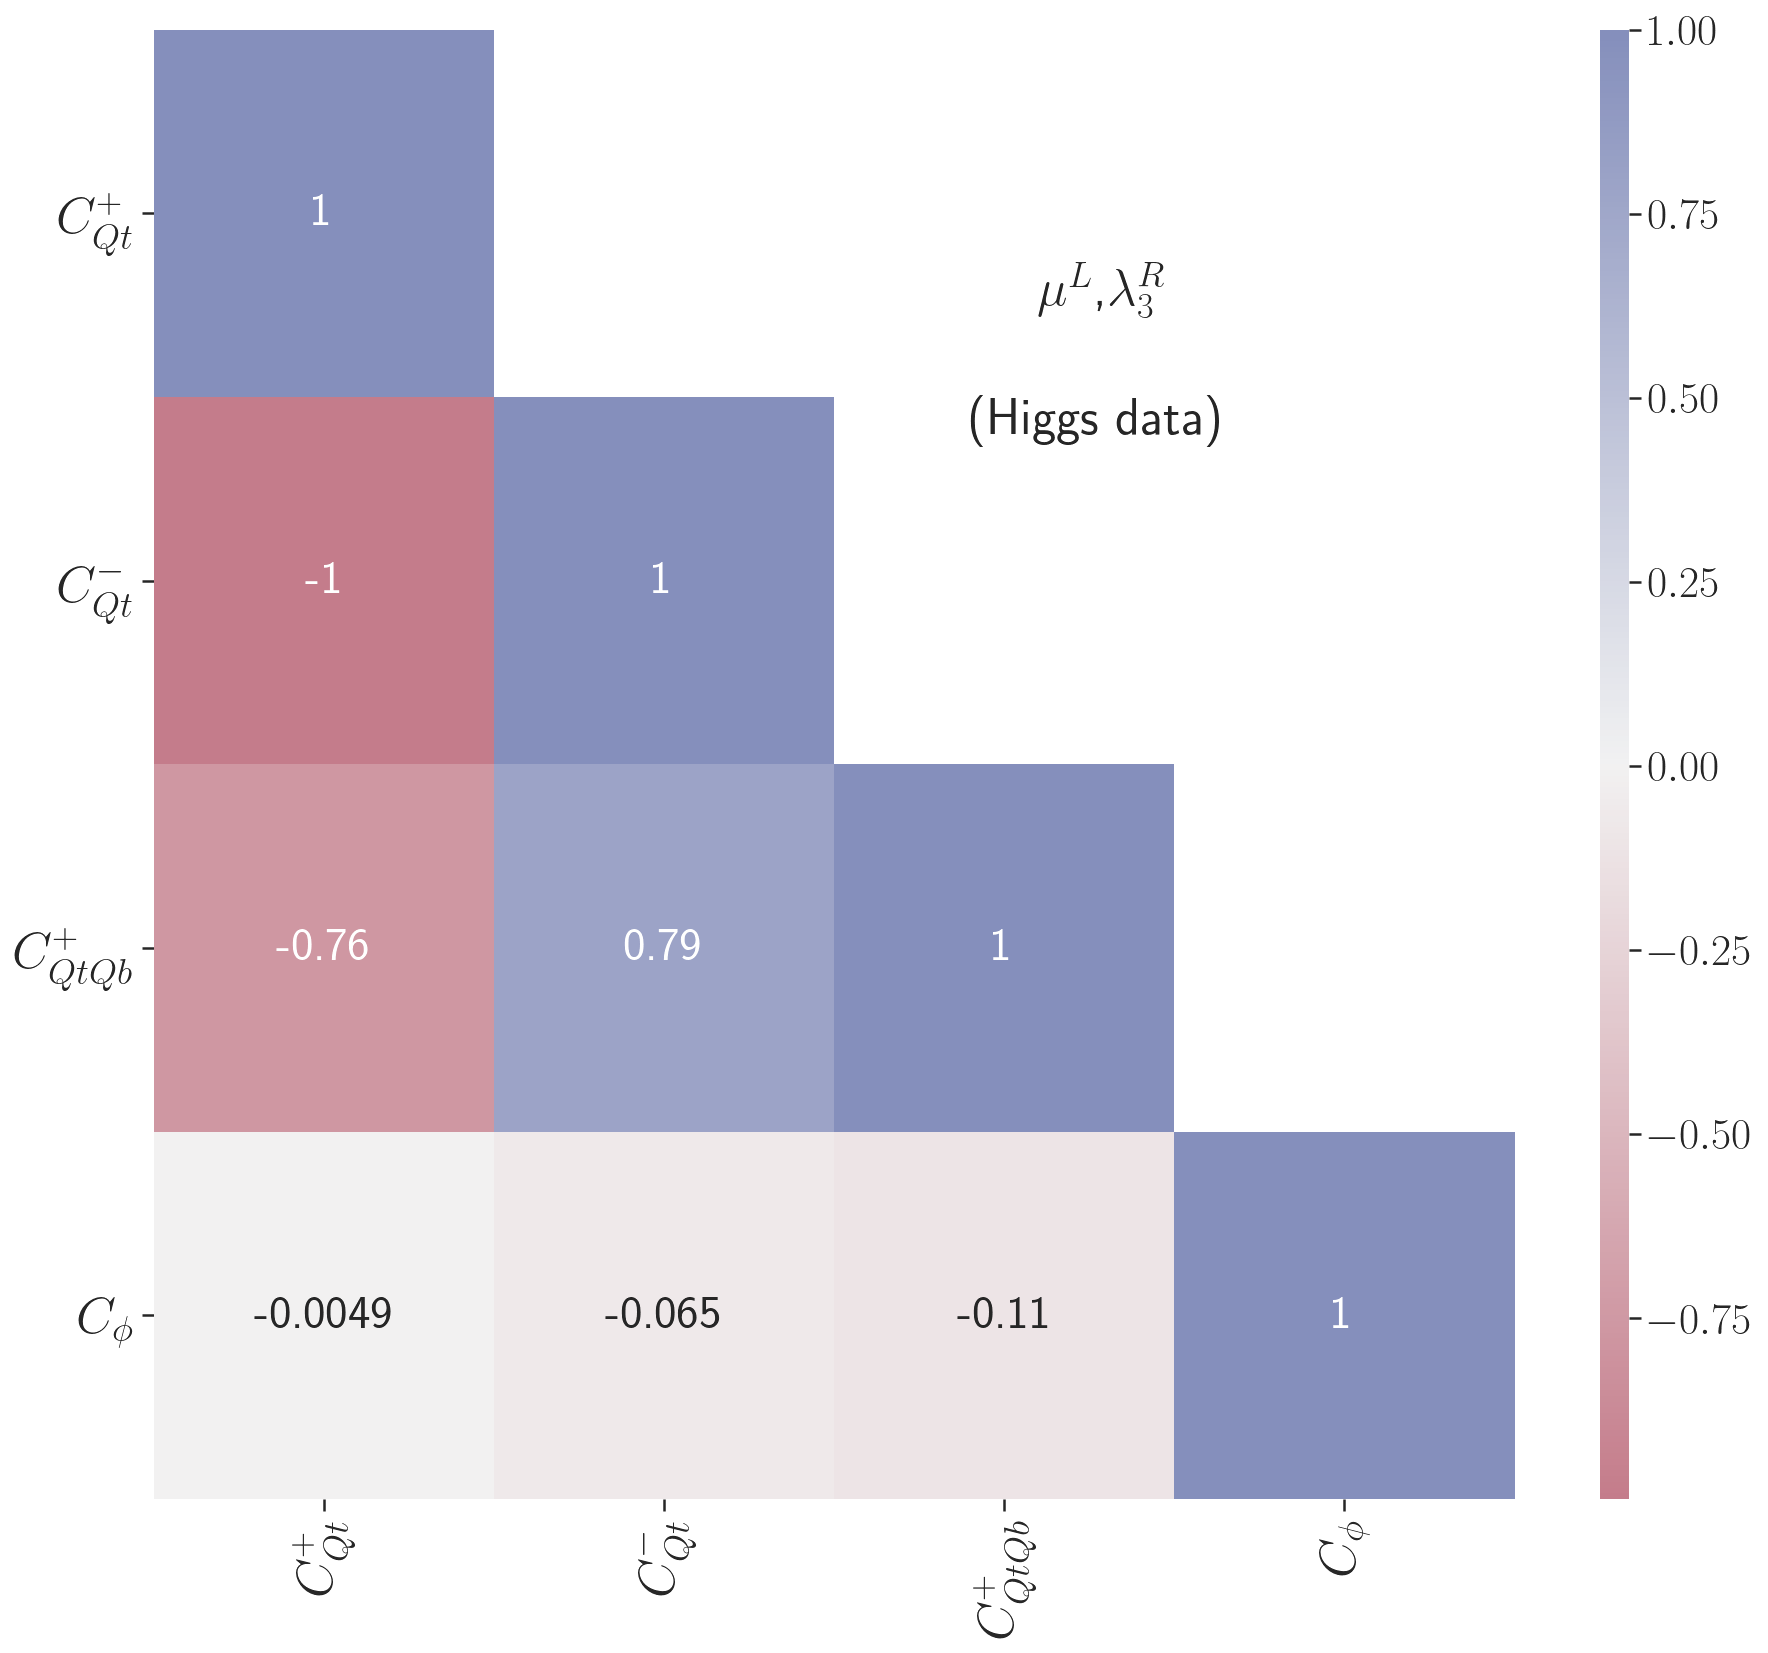

In [23]:
llCqtmchi2 =lambda Cqup,Cqum,Cquqbp,CH :-1/2*mylikelihoodAV(1/2*(Cqup+Cqum),1/2/CF*(Cqup-Cqum),
                                                   1/2/(2*Nc+1)*Cquqbp,+1/CF*Cquqbp/2,CH,data,experiments=['CMS','ATLAS'],
                                                                           HiggsChannels=['ggf','vbf','ttxh','vh','zh','wh']
                                                                           ,TopChannels=None, linearl3=False,linearmu=True)

fit4linear = fit4(llCqtmchi2)
fig, ax = plt.subplots(figsize=(13.5, 12))
cmap = sns.diverging_palette(0,259,s=38,l=60, as_cmap=True)
mask = np.zeros((fit4linear.shape[1],fit4linear.shape[1]))
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask,0)
heat = sns.heatmap(fit4linear+0., mask=mask, annot=True, cmap=cmap, cbar_kws={"aspect": 50}, xticklabels=var, yticklabels=var,
                   annot_kws={"fontsize": 24})
ax = plt.gca()
sns.set(font_scale=2., style='ticks')
plt.text(2.6,.75,r"$\mu^L$,$\lambda_3^R$",fontsize=26)
plt.text(2.4,1.1,r"(Higgs data)",fontsize=26)
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 26, rotation=90)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 26, rotation=0)
plt.tight_layout()
fig.savefig('../results/plots/4param_corr_l3_R.pdf', dpi=300)